In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('worldhappiness.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.drop(['Country','Region'],axis=1,inplace=True)

In [4]:
df

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
df.columns

Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [6]:
df.columns.size

10

In [7]:
df.shape

(158, 10)

In [8]:
df.index

RangeIndex(start=0, stop=158, step=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 158 non-null    int64  
 1   Happiness Score                158 non-null    float64
 2   Standard Error                 158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
 9   Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 12.5 KB


In [10]:
df.dtypes

Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [11]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [12]:
df.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [13]:
df.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

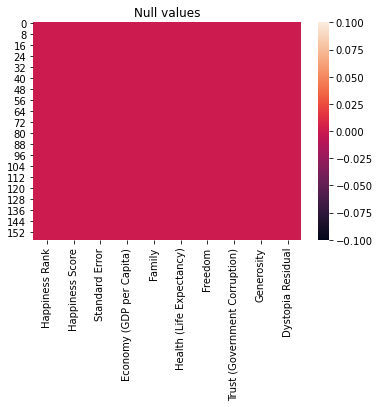

In [14]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

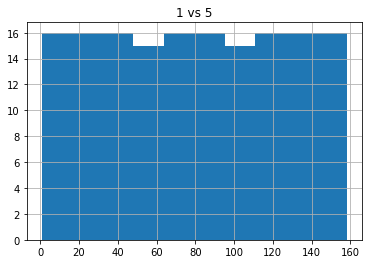

In [15]:
df["Happiness Rank"].hist(grid=True)  #Example of unvariate analysis
plt.title("1 vs 5")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


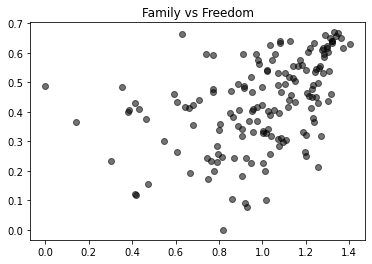

In [16]:
plt.scatter(df["Family"],df["Freedom"],alpha=0.55,c=(0,0,0))  #Example of bivariate analysis
plt.title("Family vs Freedom")
plt.show()

# checking correlation

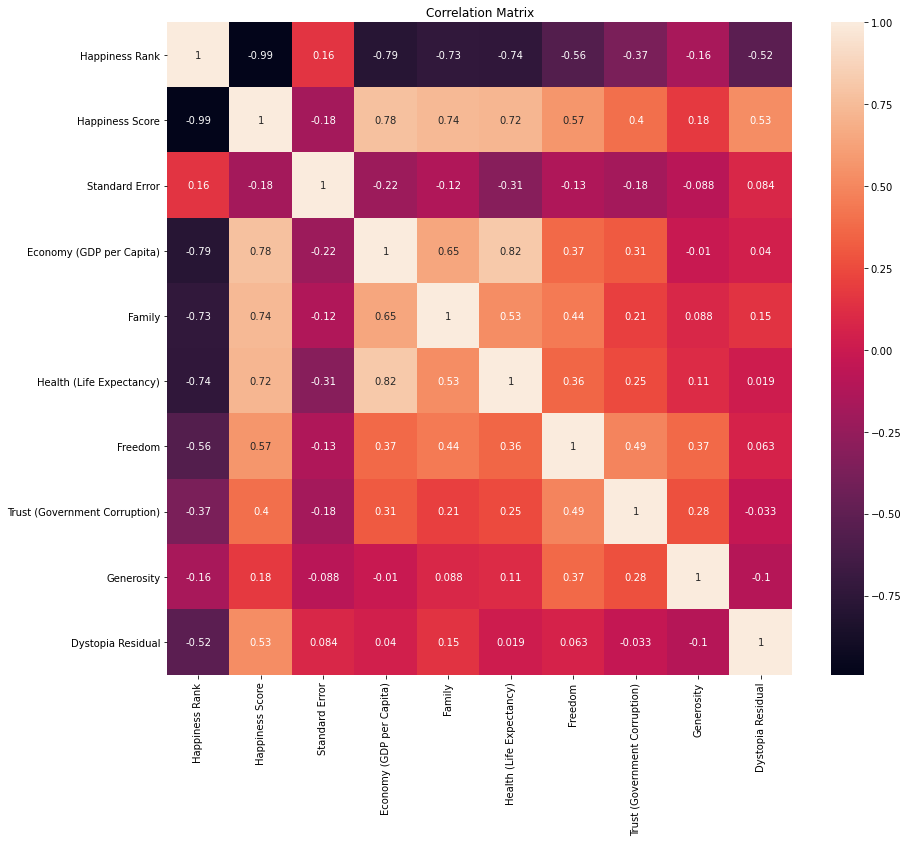

In [17]:
corr_mat=df.corr()    #Exxample of multi variate analysis

plt.figure(figsize=[14,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [18]:
df.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [19]:
df.dtypes

Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df["Family"]=LE.fit_transform(df["Family"])


In [21]:
corr_matrix=df.corr()
corr_matrix["Family"].sort_values(ascending=False)

Family                           1.000000
Happiness Score                  0.771316
Economy (GDP per Capita)         0.660804
Health (Life Expectancy)         0.548590
Freedom                          0.517443
Trust (Government Corruption)    0.257974
Dystopia Residual                0.173804
Generosity                       0.144214
Standard Error                  -0.164104
Happiness Rank                  -0.770006
Name: Family, dtype: float64

# lets check the data distribution among all the columns

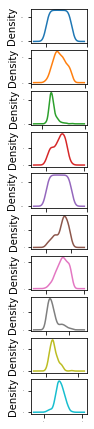

In [22]:
#another example of multi variate analysis

df.plot(kind='density',subplots=True,layout=(16,1),sharex=False,legend=False,fontsize=1,figsize=(1,12))
plt.show()

# we can se the skewness data for multile columns,will handle skewness in further steps

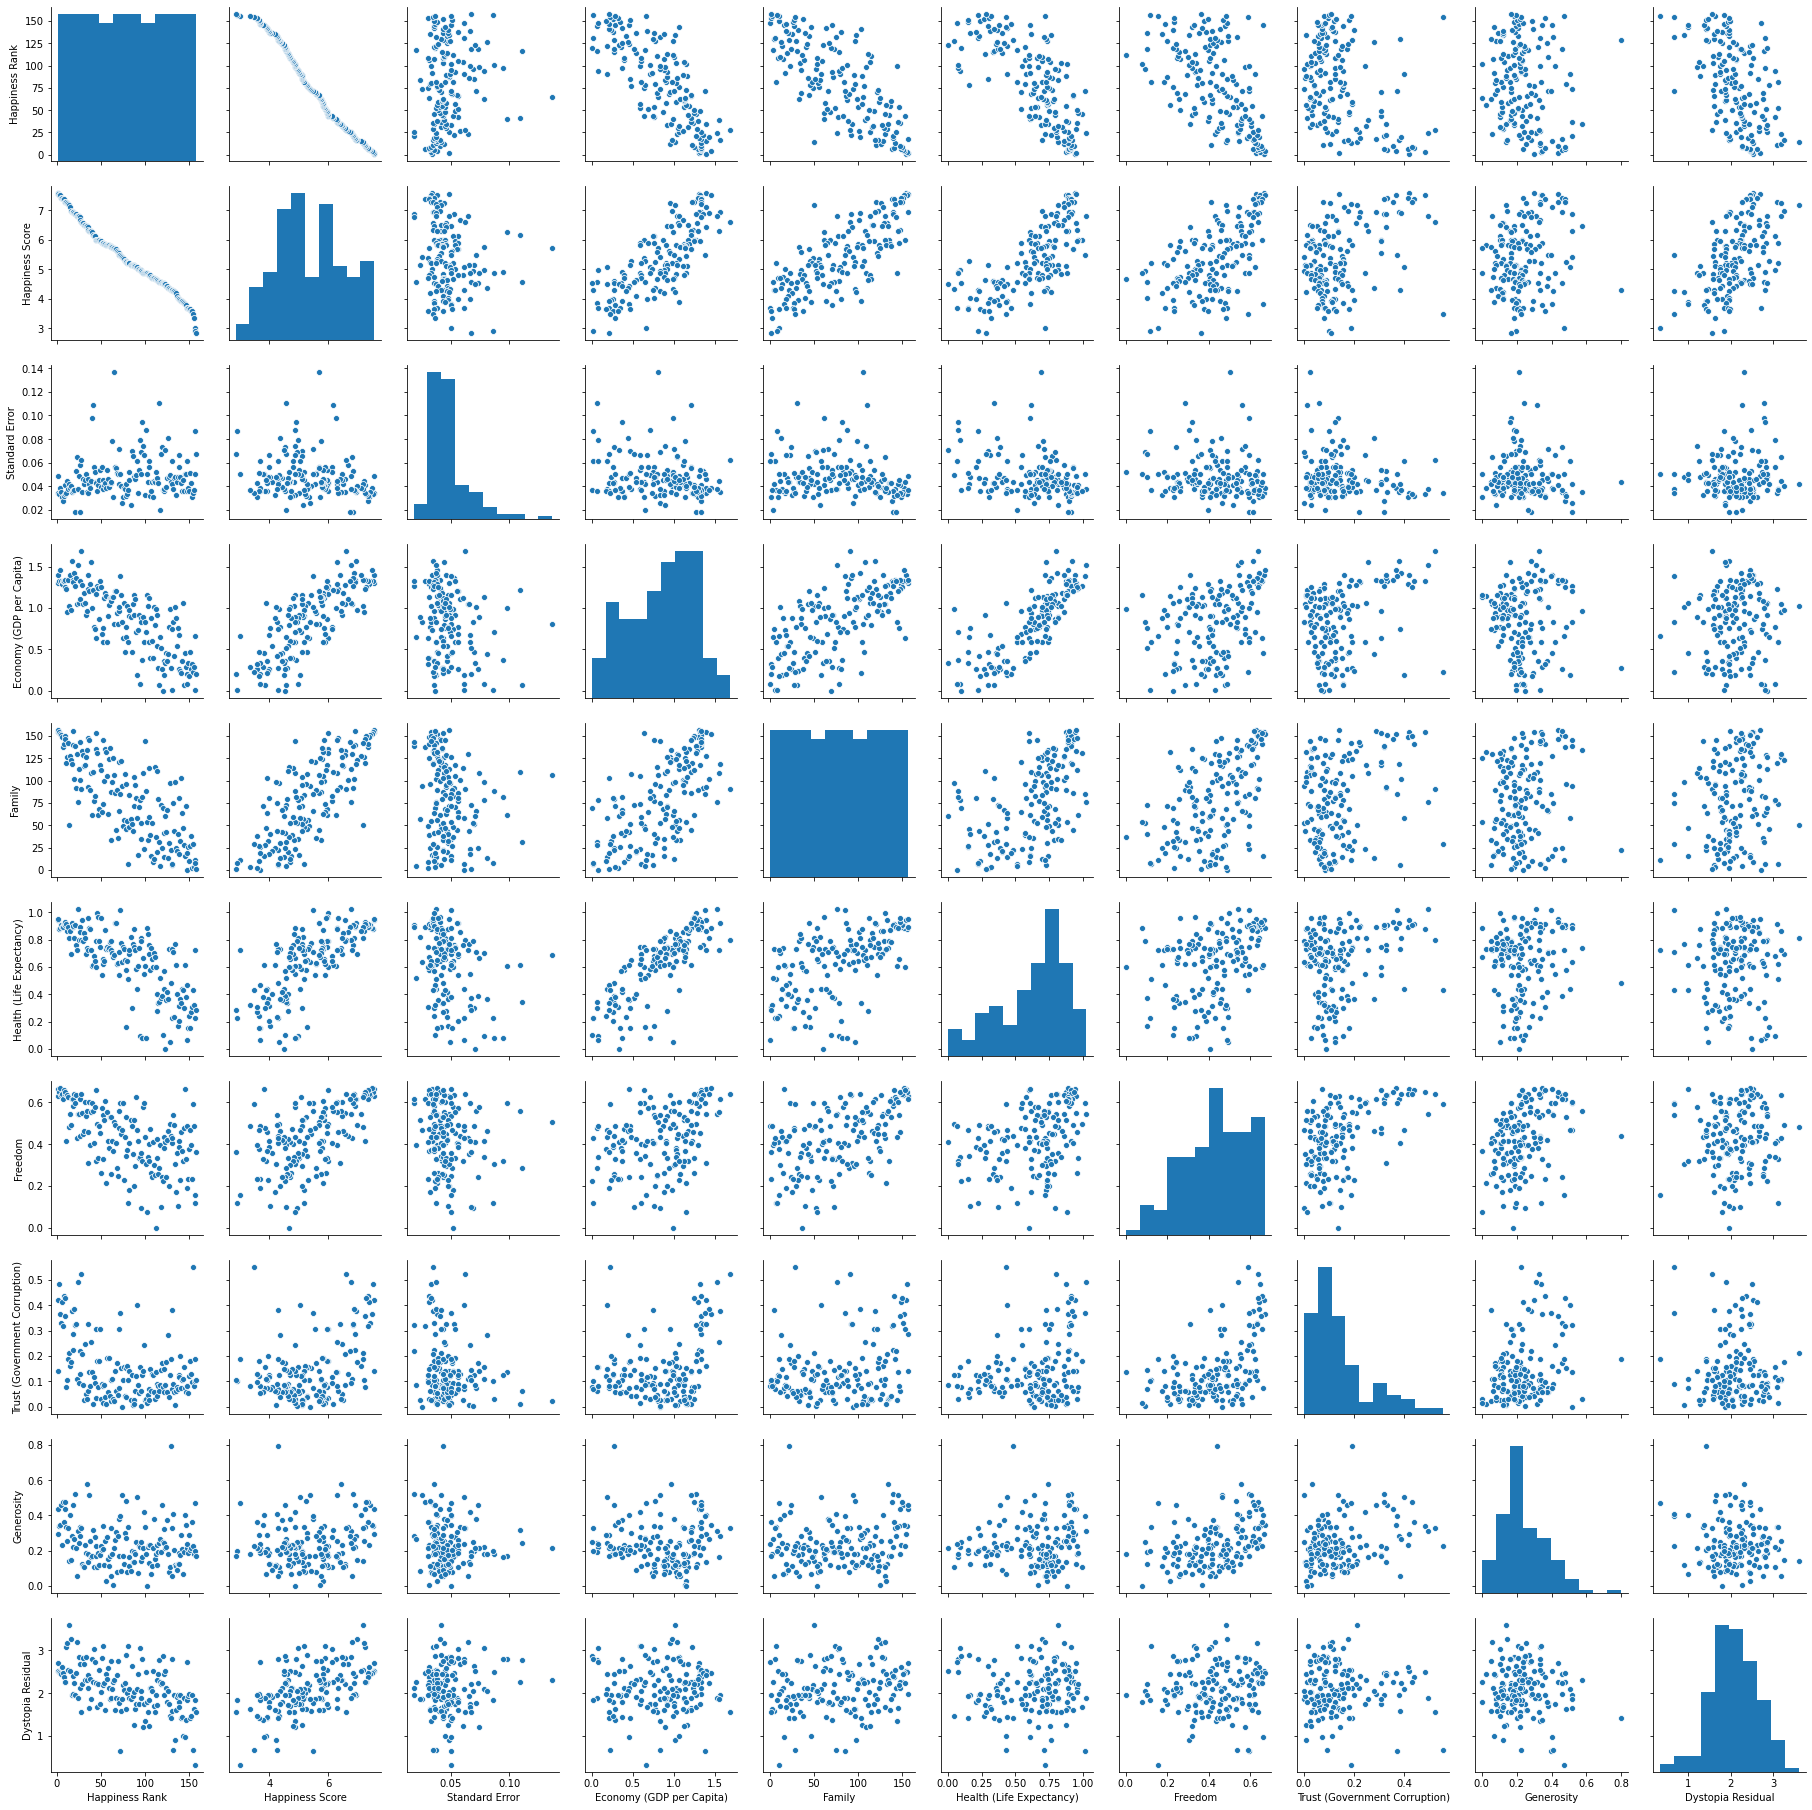

In [23]:
sns.pairplot(df)  #one more exxample for multi variate analysis
plt.show()

In [24]:
#splitting the independent and target variables in x and y
x=df.drop("Freedom",axis=1)
y=df["Freedom"]

In [25]:
df

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,154,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,157,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,155,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,152,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,151,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,29,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,3,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,11,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,8,0.22396,0.11850,0.10062,0.19727,1.83302


In [26]:
#checking skewness
x.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                           0.000000
Health (Life Expectancy)        -0.705328
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

we can see skewness in the dataset.we will remove the skewness using power_transform function

In [27]:
y=df['Score']
x=df.drop('Score',axis=1)

KeyError: 'Score'

In [ ]:
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [ ]:
df.skew()

# checking outliers

there are 61 columns in a data set so its not possible to plot each and every columns seperatly ot plot all together also.so we will print in 2 steps

In [ ]:
#plotting boxxplots for first 30 columns
x.iloc[:,0:15].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [ ]:
#plotting for rest of all columns
x.iloc[:,16:30].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

#we can se 1 or 2 values for total 3 columns but those are very near to whiskers so these are not outliers

# Finding best random_state


In [ ]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"on Random_state",maxRS)

# Creating train-test split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=137)



In [ ]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


In [ ]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

#we are getting accuracy with ___ but it can be due to overfitting also so we will check cross validation scores

In [ ]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("cross validation score of LogisticRegression model :",scr.mean())

In [ ]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dt,x,y,cv=5)
print("cross validation score of DecisionTree model :",scr.mean())

In [ ]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf,x,y,cv=5)
print("cross validation score of RandomForest model :",scr.mean())

In [ ]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc,x,y,cv=5)
print("cross validation score of SVC model :",scr.mean())

minimum difference in accuracy and cross validation score is for DecisionTreeClassifier(___)so this is the best model

# hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#creating parameter list to pass in gridsearchcv

parameters {'max_depth': np.arange(2,15),
           'critersion':['gini','entropy']}

In [ ]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)


In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [ ]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [ ]:
accuracy_score(y_test,GCV_pred)

In [ ]:
import joblib
joblib.dump(GCV.best_estimator_,"WorldhappinessModelDTC.pkl")